# Example Week

This is an example week of how statistics are created for each Instagram post. This code will cover 3 posts created in the week. 

First I import all desired libraries and the latest versions of the fight and fighter profile tables. This is done by connecting from the PostgreSQL master database.

In [5]:
# All imports for CSVs, ect
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import psycopg2
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
con = psycopg2.connect("hidden")
print("Database opened successfully")
print()
cur = con.cursor()
cur.execute('SELECT * from "Every_Fight"')
tupples = cur.fetchall()
headers = [i[0] for i in cur.description]
# Dataframe created from tupples and headers
advanced = pd.DataFrame(tupples, columns=headers)


cur.execute('SELECT * from "Fighter_Profile"')
tupples = cur.fetchall()
headers = [i[0] for i in cur.description]
fi = pd.DataFrame(tupples, columns=headers)

advanced.head(3)

Database opened successfully



,Unnamed: 0,FIGHTER_RED,FIGHER_BLUE,WEIGHT,EVENT,DATE,STATE_COUNTRY,ATTENDENCE,FINISH,ROUND_FINISHED,TIME_FINISHED,SCHEDUELED ROUNDS,REFEREE,METHOD_OF_FINISH,WINNER,TITLE_OR_NOT,BONUS,KD_RED,KD_BLUE,SIG_STR_RED,SIG_STR_BLUE,SIG_STR_PERCENT_RED,SIG_STR_PERCENT_BLUE,TOTAL_STR_RED,TOTAL_STR_BLUE,TD_RED,TD_BLUE,TD_PERCENT_RED,TD_PERCENT_BLUE,SUB_ATT_RED,SUB_ATT_BLUE,PASSES_RED,PASSES_BLUE,REV_RED,REV_BLUE,RND1_KD_RED,RND1_KD_BLUE,RND1_SIG_STR_RED,RND1_SIG_STR_BLUE,RND1_SIG_STR_PERC_RED,RND1_SIG_STR_PERC_BLUE,RND1_TOTAL_STR_RED,RND1_TOTAL_STR_BLUE,RND1_TD_RED,RND1_TD_BLUE,RND1_TD_PERC_RED,RND1_TD_PERC_BLUE,RND1_SUB_ATT_RED,RND1_SUB_ATT_BLUE,RND1_PASSES_RED,RND1_PASSES_BLUE,RND1_REV_RED,RND1_REV_BLUE,RND2_KD_RED,RND2_KD_BLUE,RND2_SIG_STR_RED,RND2_SIG_STR_BLUE,RND2_SIG_STR_PERC_RED,RND2_SIG_STR_PERC_BLUE,RND2_TOTAL_STR_RED,RND2_TOTAL_STR_BLUE,RND2_TD_RED,RND2_TD_BLUE,RND2_TD_PERC_RED,RND2_TD_PERC_BLUE,RND2_SUB_ATT_RED,RND2_SUB_ATT_BLUE,RND2_PASSES_RED,RND2_PASSES_BLUE,RND2_REV_RED,RND2_REV_BLUE,RND3_KD_RED,RND3_KD_BLUE,RND3_SIG_STR_RED,RND3_SIG_STR_BLUE,RND3_SIG_STR_PERC_RED,RND3_SIG_STR_PERC_BLUE,RND3_TOTAL_STR_RED,RND3_TOTAL_STR_BLUE,RND3_TD_RED,RND3_TD_BLUE,RND3_TD_PERC_RED,RND3_TD_PERC_BLUE,RND3_SUB_ATT_RED,RND3_SUB_ATT_BLUE,RND3_PASSES_RED,RND3_PASSES_BLUE,RND3_REV_RED,RND3_REV_BLUE,RND4_KD_RED,RND4_KD_BLUE,RND4_SIG_STR_RED,RND4_SIG_STR_BLUE,RND4_SIG_STR_PERC_RED,RND4_SIG_STR_PERC_BLUE,RND4_TOTAL_STR_RED,RND4_TOTAL_STR_BLUE,RND4_TD_RED,RND4_TD_BLUE,RND4_TD_PERC_RED,RND4_TD_PERC_BLUE,RND4_SUB_ATT_RED,RND4_SUB_ATT_BLUE,RND4_PASSES_RED,RND4_PASSES_BLUE,RND4_REV_RED,RND4_REV_BLUE,RND5_KD_RED,RND5_KD_BLUE,RND5_SIG_STR_RED,RND5_SIG_STR_BLUE,RND5_SIG_STR_PERC_RED,RND5_SIG_STR_PERC_BLUE,RND5_TOTAL_STR_RED,RND5_TOTAL_STR_BLUE,RND5_TD_RED,RND5_TD_BLUE,RND5_TD_PERC_RED,RND5_TD_PERC_BLUE,RND5_SUB_ATT_RED,RND5_SUB_ATT_BLUE,RND5_PASSES_RED,RND5_PASSES_BLUE,RND5_REV_RED,RND5_REV_BLUE,SIG_STR_TOTAL_RED,SIG_STR_TOTAL_BLUE,SIG_STR_PERC_RED,SIG_STR_PERC_BLUE,HEAD_STR_RED,HEAD_STR_BLUE,BODY_STR_RED,BODY_STR_BLUE,LEG_STR_RED,LEG_STR_BLUE,DISTANCE_RED,DISTANCE_BLUE,CLINCH_RED,CLICH_BLUE,GROUD_RED,GROUND_BLUE,RND1_SIG_STR_RED.1,RND1_SIG_STR_BLUE.1,RND1_SIG_STR_PERC_RED.1,RND1_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED,RND1_HEAD_STR_BLUE,RND1_BODY_STR_RED,RND1_BODY_STR_BLUE,RND1_LEG_STR_RED,RND1_LEG_STR_BLUE,RND1_DISTANCE_RED,RND1_DISTANCE_BLUE,RND1_CLINCH_RED,RND1_CLINCH_BLUE,RND1_GROUND_RED,RND1_GOUND_BLUE,RND2_SIG_STR_RED.1,RND2_SIG_STR_BLUE.1,RND2_SIG_STR_PERC_RED.1,RND2_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.1,RND2_HEAD_STR_BLUE,RND2_BODY_STR_RED,RND2_BODY_STR_BLUE,RND2_LEG_STR_RED,RND2_LEG_STR_BLUE,RND2_DISTANCE_RED,RND2_DISTANCE_BLUE,RND2_CLINCH_RED,RND2_CLINCH_BLUE,RND2_GROUND_RED,RND2_GOUND_BLUE,RND3_SIG_STR_RED.1,RND3_SIG_STR_BLUE.1,RND3_SIG_STR_PERC_RED.1,RND3_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.2,RND3_HEAD_STR_BLUE,RND3_BODY_STR_RED,RND3_BODY_STR_BLUE,RND3_LEG_STR_RED,RND3_LEG_STR_BLUE,RND3_DISTANCE_RED,RND3_DISTANCE_BLUE,RND3_CLINCH_RED,RND3_CLINCH_BLUE,RND3_GROUND_RED,RND3_GOUND_BLUE,RND4_SIG_STR_RED.1,RND4_SIG_STR_BLUE.1,RND4_SIG_STR_PERC_RED.1,RND4_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.3,RND4_HEAD_STR_BLUE,RND4_BODY_STR_RED,RND4_BODY_STR_BLUE,RND4_LEG_STR_RED,RND4_LEG_STR_BLUE,RND4_DISTANCE_RED,RND4_DISTANCE_BLUE,RND4_CLINCH_RED,RND4_CLINCH_BLUE,RND4_GROUND_RED,RND4_GOUND_BLUE,RND5_SIG_STR_RED.1,RND5_SIG_STR_BLUE.1,RND5_SIG_STR_PERC_RED.1,RND5_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.4,RND5_HEAD_STR_BLUE,RND5_BODY_STR_RED,RND5_BODY_STR_BLUE,RND5_LEG_STR_RED,RND5_LEG_STR_BLUE,RND5_DISTANCE_RED,RND5_DISTANCE_BLUE,RND5_CLINCH_RED,RND5_CLINCH_BLUE,RND5_GROUND_RED,RND5_GOUND_BLUE,LOSER,index
0,0,Gerard Gordea,Teila Tul,Open Weight Bout,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA","2,800",KO/TKO,1,0:26,No Time Limit,Joao Alberto Barreto,Kick to Head On Ground,Gerard Gordeau,Non-Title Bout,,0.0,0,3 of 5,0 of 1,60%,0%,3 of 5,0 of 1,0 of 0,0 of 1,0%,0%,0.0,0.0,0.0,0.0,0.0,0,0.0,0,3 of 5,0 of 1,60%,0%,3 of 5,0 of 1,0 of 0,0 of 1,0%,0%,0.0,0.0

In [7]:
fi = fi.iloc[:,2:]
fi.head(3)

,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt,Full,UFC_W,UFC_L,UFC_D,UFC_NC,FIGHTS,SIG_LAND,SIG_THROWN,TOTAL_LAND,TOTAL_THROWN,TOTAL_EATEN_L,TOTAL_EATEN_T,SIG_EATEN_L,SIG_EATEN_T,SIG_PER,TOTAL_PER,TD_L,TD_A,SUB_A,PASSES,REV,TD_PERC,KOs,SUBS,DEC,RD1_STRIKES_T,RD1_STRIKES_L,RD2_STRIKES_T,RD2_STRIKES_L,RD3_STRIKES_T,RD3_STRIKES_L,RD4_STRIKES_T,RD4_STRIKES_L,RD5_STRIKES_T,RD5_STRIKES_L,EATEN_RD1_STRIKES_T,EATEN_RD1_STRIKES_L,EATEN_RD2_STRIKES_T,EATEN_RD2_STRIKES_L,EATEN_RD3_STRIKES_T,EATEN_RD3_STRIKES_L,EATEN_RD4_STRIKES_T,EATEN_RD4_STRIKES_L,EATEN_RD5_STRIKES_T,EATEN_RD5_STRIKES_L,FIGHT_TIME,SPLIT_DEC,SPLIT_W,SPLIT_L,MAJ_W,MAJ_L,MAJ_DEC,RD1_STR_PERC,RD2_STR_PERC,RD3_STR_PERC,RD4_STR_PERC,RD5_STR_PERC,SIG_PER_MIN,TOTAL_PER_MIN,HEAD_STR_L,HEAD_STR_T,BODY_STR_L,BODY_STR_T,LEG_STR_L,LEG_STR_T,DISTANCE_STR_L,DISTANCE_STR_T,CLINCH_STR_L,CLINCH_STR_T,GROUND_STR_L,GROUND_STR_T,EATEN_HEAD_STR_L,EATEN_HEAD_STR_T,EATEN_BODY_STR_L,EATEN_BODY_STR_T,EATEN_LEG_STR_L,EATEN_LEG_STR_T,EATEN_DISTANCE_STR_L,EATEN_DISTANCE_STR_T,EATEN_CLINCH_STR_L,EATEN_CLINCH_STR_T,EATEN_GROUND_STR_L,EATEN_GROUND_STR_T,HEAD_PER,BODY_PER,LEG_PER,DIST_PER,CLINCH_PER,GROUND_PER,KO_LOSS,SUB_LOSS,DEC_LOSS
0,Danny,Abbadi,The Assassin,"5' 11""",155,--,Orthodox,4.0,6.0,0.0,None,Danny Abbadi,0,2,0,0,2,59,155,85,185,126,241,79,188,38.06,45.95,0,0,0,0,0,NaN,0,0,0,55,33,52,22,78,30,0,0,0,0,100,76,80,32,61,18,0,0,0,0,17.56,1,0,1,0,0,0,0.60,0.42,0.38,NaN,NaN,3.36,4.84,51,145,8,10,0,0,42,127,14,24,3,4,59,166,17,19,3,3,46,133,17,23,16,32,86.44,13.56,0.0,71.19,23.73,5.08,0,1,1
1,David,Abbott,Tank,"6' 0""",265,--,Switch,10.0,15.0,0.0,None,David Abbott,8,10,0,0,18,156,351,311,533,654,781,209,308,44.44,58.35,10,16,4,10,1,62.50,5,2,1,490,283,43,28,0,0,0,0,0,0,731,617,50,37,0,0,0,0,0,0,48.98,0,0,0,0,0,0,0.58,0.65,NaN,NaN,NaN,3.18,6.35,148,342,8,9,0,0,54,156,46,92,56,103,114,207,57,61,38,40,62,121,75,98,72,89,94.87,5.13,0.0,34.62,29.49,35.90,3,5,2
2,Shamil,Abdurakhimov,Abrek,"6' 3""",235,"76.0""",Orthodox,20.0,5.0,0.0,None,Shamil Abdurakhimov,5,3,0,0,8,210,469,341,613,269,584,210,508,44.78,55.63,7,29,1,4,0,24.14,2,0,3,252,133,203,129,149,76,9,3,0,0,261,118,151,71,124,52,48,28,0,0,84.60,1,1,0,0,0,0,0.53,0.64,0.51,0.33,NaN,2.48,4.03,131,354,37,58,42,57,129,347,59,91,22,31,138,412,42,61,30,35,93,323,53,91,64,94,62.38,17.62,20.0,61.43,28.10,10.48,3,0,0


## Post 1

In this post the goal is to determine how an athlete preforms after being away from the sport for a year or longer. We will discover the overall record of fighters who have had this layoff in their first fight back in action.

Convert the date column into a datetime object, this will allow me to preform calculations on dates later. Then I create a new version of all of the fight data sorted by the date.

In [3]:
advanced['DATE']= pd.to_datetime(advanced['DATE']) 

In [4]:
datesort = advanced.sort_values(by='DATE')

In [5]:
datesort.head(3)

,Unnamed: 0,FIGHTER_RED,FIGHER_BLUE,WEIGHT,EVENT,DATE,STATE_COUNTRY,ATTENDENCE,FINISH,ROUND_FINISHED,TIME_FINISHED,SCHEDUELED ROUNDS,REFEREE,METHOD_OF_FINISH,WINNER,TITLE_OR_NOT,BONUS,KD_RED,KD_BLUE,SIG_STR_RED,SIG_STR_BLUE,SIG_STR_PERCENT_RED,SIG_STR_PERCENT_BLUE,TOTAL_STR_RED,TOTAL_STR_BLUE,TD_RED,TD_BLUE,TD_PERCENT_RED,TD_PERCENT_BLUE,SUB_ATT_RED,SUB_ATT_BLUE,PASSES_RED,PASSES_BLUE,REV_RED,REV_BLUE,RND1_KD_RED,RND1_KD_BLUE,RND1_SIG_STR_RED,RND1_SIG_STR_BLUE,RND1_SIG_STR_PERC_RED,RND1_SIG_STR_PERC_BLUE,RND1_TOTAL_STR_RED,RND1_TOTAL_STR_BLUE,RND1_TD_RED,RND1_TD_BLUE,RND1_TD_PERC_RED,RND1_TD_PERC_BLUE,RND1_SUB_ATT_RED,RND1_SUB_ATT_BLUE,RND1_PASSES_RED,RND1_PASSES_BLUE,RND1_REV_RED,RND1_REV_BLUE,RND2_KD_RED,RND2_KD_BLUE,RND2_SIG_STR_RED,RND2_SIG_STR_BLUE,RND2_SIG_STR_PERC_RED,RND2_SIG_STR_PERC_BLUE,RND2_TOTAL_STR_RED,RND2_TOTAL_STR_BLUE,RND2_TD_RED,RND2_TD_BLUE,RND2_TD_PERC_RED,RND2_TD_PERC_BLUE,RND2_SUB_ATT_RED,RND2_SUB_ATT_BLUE,RND2_PASSES_RED,RND2_PASSES_BLUE,RND2_REV_RED,RND2_REV_BLUE,RND3_KD_RED,RND3_KD_BLUE,RND3_SIG_STR_RED,RND3_SIG_STR_BLUE,RND3_SIG_STR_PERC_RED,RND3_SIG_STR_PERC_BLUE,RND3_TOTAL_STR_RED,RND3_TOTAL_STR_BLUE,RND3_TD_RED,RND3_TD_BLUE,RND3_TD_PERC_RED,RND3_TD_PERC_BLUE,RND3_SUB_ATT_RED,RND3_SUB_ATT_BLUE,RND3_PASSES_RED,RND3_PASSES_BLUE,RND3_REV_RED,RND3_REV_BLUE,RND4_KD_RED,RND4_KD_BLUE,RND4_SIG_STR_RED,RND4_SIG_STR_BLUE,RND4_SIG_STR_PERC_RED,RND4_SIG_STR_PERC_BLUE,RND4_TOTAL_STR_RED,RND4_TOTAL_STR_BLUE,RND4_TD_RED,RND4_TD_BLUE,RND4_TD_PERC_RED,RND4_TD_PERC_BLUE,RND4_SUB_ATT_RED,RND4_SUB_ATT_BLUE,RND4_PASSES_RED,RND4_PASSES_BLUE,RND4_REV_RED,RND4_REV_BLUE,RND5_KD_RED,RND5_KD_BLUE,RND5_SIG_STR_RED,RND5_SIG_STR_BLUE,RND5_SIG_STR_PERC_RED,RND5_SIG_STR_PERC_BLUE,RND5_TOTAL_STR_RED,RND5_TOTAL_STR_BLUE,RND5_TD_RED,RND5_TD_BLUE,RND5_TD_PERC_RED,RND5_TD_PERC_BLUE,RND5_SUB_ATT_RED,RND5_SUB_ATT_BLUE,RND5_PASSES_RED,RND5_PASSES_BLUE,RND5_REV_RED,RND5_REV_BLUE,SIG_STR_TOTAL_RED,SIG_STR_TOTAL_BLUE,SIG_STR_PERC_RED,SIG_STR_PERC_BLUE,HEAD_STR_RED,HEAD_STR_BLUE,BODY_STR_RED,BODY_STR_BLUE,LEG_STR_RED,LEG_STR_BLUE,DISTANCE_RED,DISTANCE_BLUE,CLINCH_RED,CLICH_BLUE,GROUD_RED,GROUND_BLUE,RND1_SIG_STR_RED.1,RND1_SIG_STR_BLUE.1,RND1_SIG_STR_PERC_RED.1,RND1_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED,RND1_HEAD_STR_BLUE,RND1_BODY_STR_RED,RND1_BODY_STR_BLUE,RND1_LEG_STR_RED,RND1_LEG_STR_BLUE,RND1_DISTANCE_RED,RND1_DISTANCE_BLUE,RND1_CLINCH_RED,RND1_CLINCH_BLUE,RND1_GROUND_RED,RND1_GOUND_BLUE,RND2_SIG_STR_RED.1,RND2_SIG_STR_BLUE.1,RND2_SIG_STR_PERC_RED.1,RND2_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.1,RND2_HEAD_STR_BLUE,RND2_BODY_STR_RED,RND2_BODY_STR_BLUE,RND2_LEG_STR_RED,RND2_LEG_STR_BLUE,RND2_DISTANCE_RED,RND2_DISTANCE_BLUE,RND2_CLINCH_RED,RND2_CLINCH_BLUE,RND2_GROUND_RED,RND2_GOUND_BLUE,RND3_SIG_STR_RED.1,RND3_SIG_STR_BLUE.1,RND3_SIG_STR_PERC_RED.1,RND3_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.2,RND3_HEAD_STR_BLUE,RND3_BODY_STR_RED,RND3_BODY_STR_BLUE,RND3_LEG_STR_RED,RND3_LEG_STR_BLUE,RND3_DISTANCE_RED,RND3_DISTANCE_BLUE,RND3_CLINCH_RED,RND3_CLINCH_BLUE,RND3_GROUND_RED,RND3_GOUND_BLUE,RND4_SIG_STR_RED.1,RND4_SIG_STR_BLUE.1,RND4_SIG_STR_PERC_RED.1,RND4_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.3,RND4_HEAD_STR_BLUE,RND4_BODY_STR_RED,RND4_BODY_STR_BLUE,RND4_LEG_STR_RED,RND4_LEG_STR_BLUE,RND4_DISTANCE_RED,RND4_DISTANCE_BLUE,RND4_CLINCH_RED,RND4_CLINCH_BLUE,RND4_GROUND_RED,RND4_GOUND_BLUE,RND5_SIG_STR_RED.1,RND5_SIG_STR_BLUE.1,RND5_SIG_STR_PERC_RED.1,RND5_SIG_STR_PERC_BLUE.1,RND1_HEAD_STR_RED.4,RND5_HEAD_STR_BLUE,RND5_BODY_STR_RED,RND5_BODY_STR_BLUE,RND5_LEG_STR_RED,RND5_LEG_STR_BLUE,RND5_DISTANCE_RED,RND5_DISTANCE_BLUE,RND5_CLINCH_RED,RND5_CLINCH_BLUE,RND5_GROUND_RED,RND5_GOUND_BLUE,LOSER
5472,5472,Kevin Rosie,Zane Frazie,Open Weight Bout,UFC 1: The Beginning,1993-11-12,"Denver, Colorado, USA","2,800",KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,toCorner Stoppage,Kevin Rosier,Non-Title Bout,,2.0,0.0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,0 of 0,0 of 0,0%,0%,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,0 of 0,0 o

In [6]:
# Blank dataframe that will have data appended too.

middle = pd.DataFrame()
middle['Name'] = 0
data = pd.DataFrame({"A": range(3000)})
middle = middle.append(data)
middle['Year'] = 0
middle = middle[['Name','Year']]
middle['W'] = 0
middle['L'] = 0
middle['D'] = 0
middle['Finish_W'] = 0
middle['Finish_L'] = 0
middle.head(3)

,Name,Year,W,L,D,Finish_W,Finish_L
0,NaN,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0


After web-scraping the UFC fight data, I noticed that some names had clerical errors. In some cases names were missing the last letter, for example “Brock” might be recorded as “Broc” in some instances. This function is used to check for this.

In [7]:
def name_check(name,check):
    """
    -------------------------------------------------------
    Checks to see if two names are the same despite errors
    in recording
    Use: result = name_check(name,check)
    -------------------------------------------------------
    Parameters:
        name - the proper full name (str)
        check - the name tested for comparison (str)
    Returns:
        Result - Whether the names match or not (bool)
    -------------------------------------------------------
    """
    name = name.lower()
    check = check.lower()
    # If the name length is more than 1 it has to be false
    
    if abs(len(name) - len(check)) > 1:
        result = False
        
    # If the name is in check
        
    elif name in check or check in name:
        result = True
        
    else:
        result = False
        
    return result

This loop will iterate through each fighter on the current UFC roster first adding their name to the blank dataframe and creating an empty list for date time objects. Next iterate through the individual fight database, check if the athlete was involved in the fight. If the athlete was involved in the fight, it will add the date to the list. Then the next fight the athlete is involved in that date is subtracted from the last fight date, if the result is 365 or higher then that fighter was off a year or more. Lastly, it gathers details of that fight, whether the fighter won, lost or the fight was a draw and if the fight was finished (didn’t go to decision).

In [8]:
count = 0 
for i in fi['Full']:
    datelist = []
    middle['Name'].iloc[count] = i
    for a in datesort[['FIGHTER_RED','FIGHER_BLUE','DATE','FINISH','WINNER','EVENT']].values:
        if a[0] != 0 and a[1] != 0:
            if name_check(i,a[0]) or name_check(i,a[1]) :
                if len(datelist) != 0:
                    answer = a[2] - datelist[len(datelist) - 1]
                    datelist.append(a[2])
                    if answer.days >= 365:
                        middle['Year'].iloc[count] += 1
                        if name_check(i,a[4]):
                            middle['W'].iloc[count] += 1
                            if 'Dec' not in a[3]:
                                middle['Finish_W'].iloc[count] += 1
                        elif a[4] == 'Draw':
                            middle['D'].iloc[count] +=1

                        else:
                            middle['L'].iloc[count] += 1
                            if 'Dec' not in a[3]:
                                middle['Finish_L'].iloc[count] += 1       

                else:
                    datelist.append(a[2])

                
                
    count += 1       

In [9]:
# Filter out those who have no year+ layoffs
middle = middle[middle['Year'] > 0]

In [10]:
# top 5 in layoff return wins
middle.sort_values(by = 'W', ascending = False).head()

,Name,Year,W,L,D,Finish_W,Finish_L
1333,Tito Ortiz,4,3,1,0,2,0
1412,Vinc Pichel,3,3,0,0,1,0
415,Germaine de Randamie,3,3,0,0,2,0
1307,Khabib Nurmagomedov,2,2,0,0,1,0
871,Jon Jones,3,2,0,1,1,0


In [11]:
print("Total Fights:",middle['Year'].sum(),", Total Wins:",middle['W'].sum(),", Losses:",middle['L'].sum(),", Draws:",middle['D'].sum(),"\nWins by Finish:",middle['Finish_W'].sum(),", Losses by finish:",middle['Finish_L'].sum())

Total Fights: 811 , Total Wins: 333 , Losses: 462 , Draws: 16 
Wins by Finish: 185 , Losses by finish: 264


### Post 2

The goal of this post is to determine the change in number of events per year in the UFC from 1994 to 2019 (1993 wasn’t a full calendar year of events and 2020 is not yet complete at the time of this post). Currently the UFC has pay per view events (PPV) and non-PPV events aired on TV. Non-PPV events are broken down into “Fight Nights” and” The Ultimate Fighter Finales”. 

First, I create a dataframe with just the event title, date and a new created column year.

In [13]:
temp = advanced.iloc[:,4:6]

count = 0
temp['YEAR'] = 0

for i in temp['DATE']:
    temp["YEAR"].iloc[count] = i.year
    
    count += 1

In [14]:
temp.head(3)

,EVENT,DATE,YEAR
0,UFC 248: Adesanya vs. Romero,2020-03-07,2020
1,UFC 248: Adesanya vs. Romero,2020-03-07,2020
2,UFC 248: Adesanya vs. Romero,2020-03-07,2020


Next is separating PPV events from non-PPV events, then determining the number of events grouped by the year.

In [15]:
fightnight = temp[(temp['EVENT'].str.contains("Fight Night")) | (temp['EVENT'].str.contains("Fin"))]
UFC= temp[(temp['EVENT'].str.contains("Fight Night") == False) & (temp['EVENT'].str.contains("Fin") == False)]

In [16]:
temp2 = temp[['YEAR','EVENT']].groupby("YEAR").describe().xs('EVENT', axis = 1).iloc[:,0:2]
temp2['Year'] = temp2.index

temp2 = temp2[['Year','unique']]
temp2['Year'] = temp2['Year'].astype(int)
temp2['unique'] = temp2['unique'].astype(int)
temp2 = temp2[(temp2['Year'] > 1993) & (temp2['Year'] < 2020)]
temp2.head(3)

,Year,unique
YEAR,,
1994,1994,3
1995,1995,4
1996,1996,5


In [17]:
fightnight2 = fightnight[['YEAR','EVENT']].groupby("YEAR").describe().xs('EVENT', axis = 1).iloc[:,0:2]
fightnight2['Year'] = fightnight2.index

fightnight2 = fightnight2[['Year','unique']]
fightnight2['Year'] = fightnight2['Year'].astype(int)
fightnight2['unique'] = fightnight2['unique'].astype(int)
fightnight2 = fightnight2[(fightnight2['Year'] > 1993) & (fightnight2['Year'] < 2020)]
fightnight2.head(3)

,Year,unique
YEAR,,
2005,2005,4
2006,2006,8
2007,2007,6


In [18]:
UFC2= UFC[['YEAR','EVENT']].groupby("YEAR").describe().xs('EVENT', axis = 1).iloc[:,0:2]
UFC2['Year'] = UFC2.index

UFC2 = UFC2[['Year','unique']]
UFC2['Year'] = UFC2['Year'].astype(int)
UFC2['unique'] = UFC2['unique'].astype(int)
UFC2 = UFC2[(UFC2['Year'] > 1993) & (UFC2['Year'] < 2020)]
UFC2.head(3)

,Year,unique
YEAR,,
1994,1994,3
1995,1995,4
1996,1996,5


Lastly creating a line plot to display the change of events over the years. As you can tell the number of non-PPV events has risen drastically in recent years as PPV events have lowered. Very interesting!

Text(0.5, 178.0, 'Year')

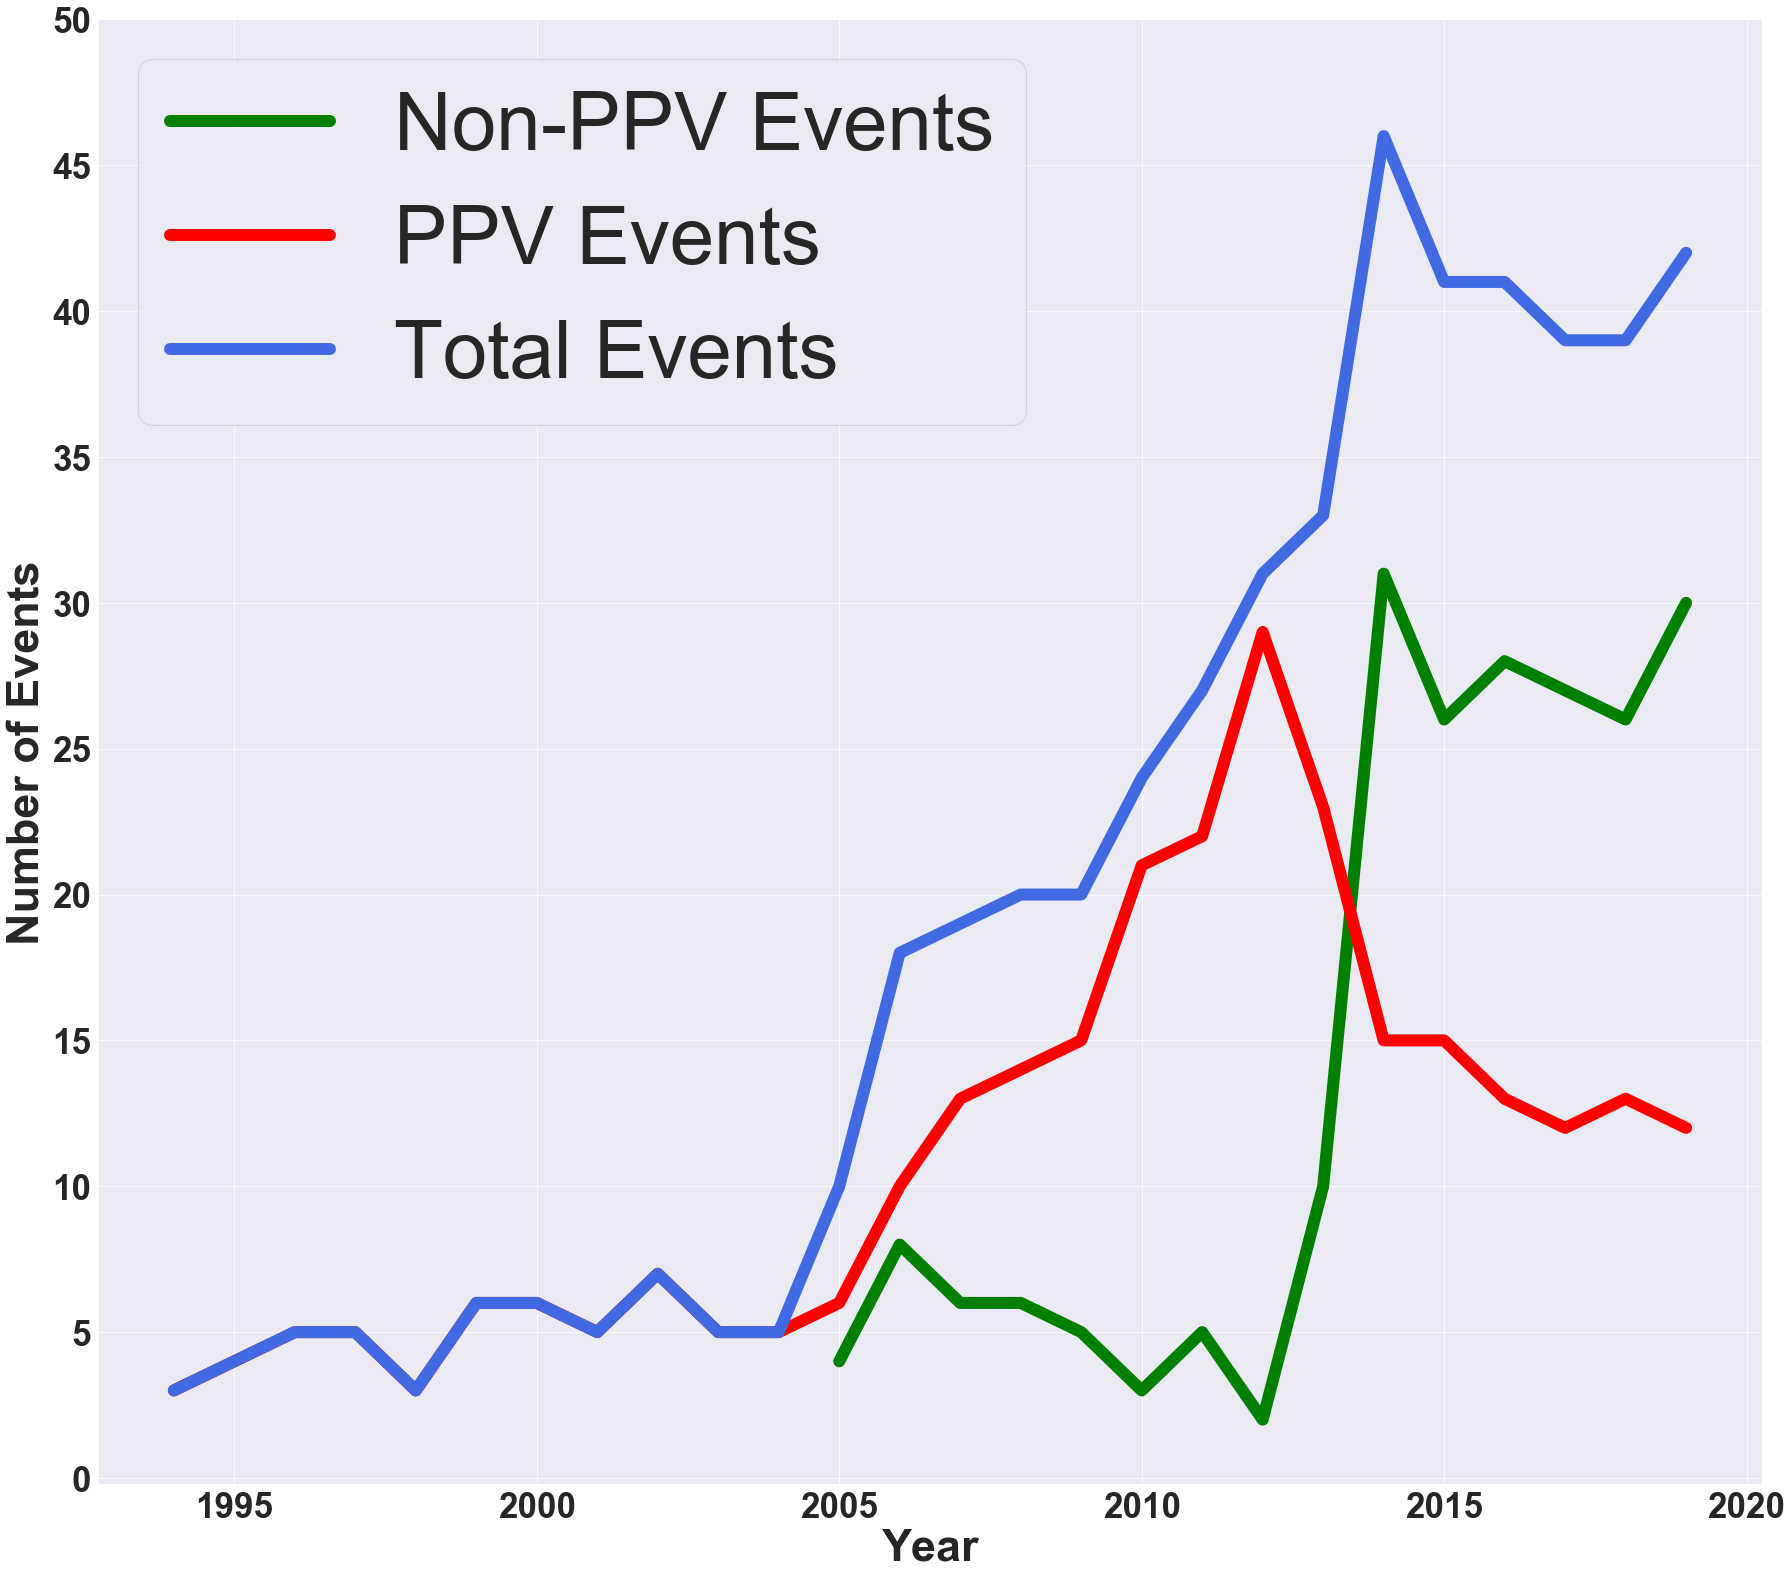

In [20]:
f, ax = plt.subplots(figsize = (25,22))
rcParams.update({'figure.autolayout': True})

plt.tight_layout()

sns.set_style('darkgrid')
ax1 = sns.lineplot(x='Year',y='unique',data = fightnight2,label="Non-PPV Events",linewidth = 12, color = 'green')
ax2 = sns.lineplot(x = 'Year',y='unique',data=UFC2,label="PPV Events",linewidth = 12,color = 'red')
ax3 = sns.lineplot(x='Year',y='unique',data = temp2, label="Total Events",linewidth = 12,color = 'royalblue')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50])


for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(35)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(35)
    tick.label1.set_fontweight('bold')

ax.legend(ncol = 1,prop={'size': 80}, loc= 'upper left')
plt.ylabel('Number of Events',fontsize=45, fontweight='bold')
plt.xlabel('Year',fontsize= 45, fontweight='bold')